<a href="https://colab.research.google.com/github/Ani-Das/Image-recognition-using-Neural-Networks/blob/main/Proj2T_ensorflowneuralnetworkrecognition_24Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED 

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras 

LOADING AND SPLITTING THE DATA 

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(X_train[0].shape)

(32, 32, 3)


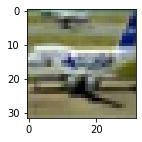

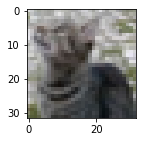

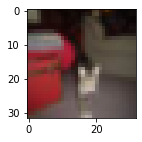

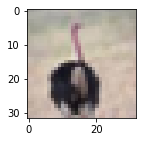

In [15]:

for i in range(332,336):
    plt.subplots(figsize=(2,2))
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [7]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [8]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 490s 1s/step - loss: 1.5959 - accuracy: 0.4137 - val_loss: 1.1925 - val_accuracy: 0.5628
Epoch 2/10
391/391 [==============================] - 487s 1s/step - loss: 1.0871 - accuracy: 0.6164 - val_loss: 0.9260 - val_accuracy: 0.6772
Epoch 3/10
391/391 [==============================] - 488s 1s/step - loss: 0.8953 - accuracy: 0.6872 - val_loss: 0.8009 - val_accuracy: 0.7167
Epoch 4/10
391/391 [==============================] - 487s 1s/step - loss: 0.7875 - accuracy: 0.7236 - val_loss: 0.7135 - val_accuracy: 0.7544
Epoch 5/10
391/391 [==============================] - 487s 1s/step - loss: 0.6996 - accuracy: 0.7565 - val_loss: 0.7024 - val_accuracy: 0.7588
Epoch 6/10
391/391 [==============================] - 487s 1s/step - loss: 0.6388 - accuracy: 0.7785 - val_loss: 0.6667 - val_accuracy: 0.7640
Epoch 7/10
391/391 [==============================] - 489s 1s/step - loss: 0.5840 - accuracy: 0.7950 - val_loss: 0.6761 - val_accuracy: 0.7688

PREDICTING 

In [9]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 136ms/step


In [10]:
print (predictions)

[[8.86209964e-05 3.31284969e-06 5.13221473e-02 1.58676356e-02
  7.37978935e-01 6.83956370e-02 3.10912932e-04 1.25960276e-01
  3.95246025e-05 3.30665207e-05]
 [7.01303652e-05 5.79480593e-06 5.08843437e-02 1.21098116e-01
  3.95416319e-02 7.38462389e-01 4.69463039e-03 4.51181345e-02
  3.06941620e-05 9.40495229e-05]
 [5.71709506e-06 1.71014290e-05 3.44476051e-04 9.18206014e-03
  1.10966750e-04 1.82255788e-03 9.88363206e-01 1.18962103e-04
  1.93450842e-06 3.30361909e-05]
 [1.97929603e-06 9.13039116e-07 3.95529065e-03 9.33901012e-01
  6.69514528e-03 5.05058793e-03 5.03021628e-02 6.62863604e-05
  9.80007280e-06 1.69459636e-05]
 [3.60224461e-10 9.99776304e-01 1.55898298e-12 3.32667075e-12
  6.02270760e-16 7.31327095e-14 8.30025122e-13 1.52427468e-13
  2.58567127e-07 2.23419294e-04]
 [4.01595344e-08 9.99678731e-01 3.84117316e-09 2.09791260e-08
  2.57919163e-12 1.07921984e-10 1.78587616e-08 1.53903765e-11
  1.45718186e-05 3.06634465e-04]
 [6.84942724e-03 1.48437116e-02 7.97577724e-02 2.88172811e

In [11]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0000001
0.99999994
0.99999994
1.0000001
0.9999999
1.0


In [12]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 6 6 8]


FINAL OBJECT DETECTION 

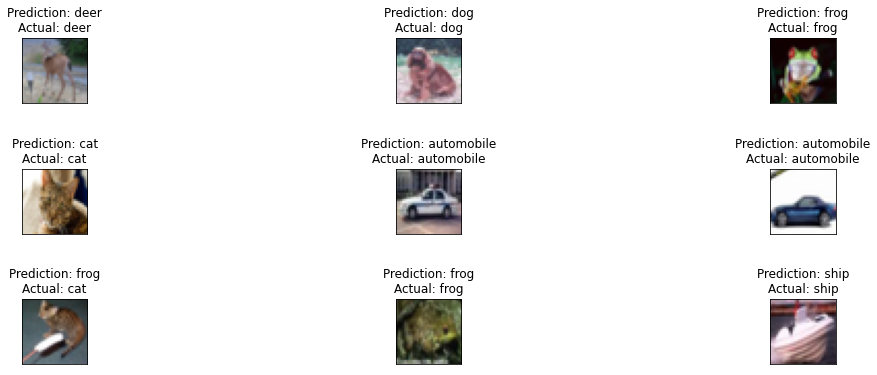

In [13]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()